In [191]:
import math
import random
import matplotlib.pyplot as plt

#generates random decision variables values
def griewank_generate(lb,ub):
	return lb + (ub-lb)*random.random()

#calculate fitness value based on griewank function
def griewank(solution):
	summation=0.0
	product=1.0
	dimension=len(solution)
	for i in range(dimension):
		summation = summation + (solution[i]*solution[i])/4000
		product = product * math.cos(solution[i]/math.sqrt(i+1))

	return summation - product + 1

#generate a population based on griewank lower and upper bounds
def generate_griewank_popn(pop_size,dimension,lb,ub):
	population=[]
	for k in range(pop_size):
		population.append([griewank_generate(lb,ub) for i in range(dimension)])
	return population

#set initial velocities to zero
def init_velocities(pop_size,dimension):
	velocity=[]
	for k in range(pop_size):
		for i in range(dimension):
			velocity.append([0] * dimension)
	return velocity

#calculate fitness of all population
def popn_fitness(population):
	return [griewank(i) for i in population]

#velocity update equation
def velocity_update(inertia,velocities,alpha,beta,particles,best_particle,particle_best):
	new_velocity=[]
	for k in range(len(particles)):
		social_part = [alpha*random.random()*(a - b) for a, b in zip(best_particle, particles[k])]
		cognitive_part = [beta*random.random() *(a -b) for a, b in zip(particle_best[k], particles[k])]
		velocity = [inertia*a + b + c for a,b,c in zip(velocities[k],social_part,cognitive_part)]
		new_velocity.append(velocity)
	return new_velocity

#position update equation
def position_update(new_velocity,particles):
	new_position=[]
	for k in range(len(particles)):
		new_position.append([a + b for a, b in zip(new_velocity[k],particles[k])])
	return new_position

#clip the variable values within lower and upper bound
def within_range(solutions,lb,ub):
	size = len(solutions)
	dim = len(solutions[0])
	for k in range(size):
		particle = solutions[k]
		for l in range(dim):
			if particle[l] < lb: particle[l] = lb
			if particle[l] > ub: particle[l] = ub
		solutions[k]=particle
	return solutions

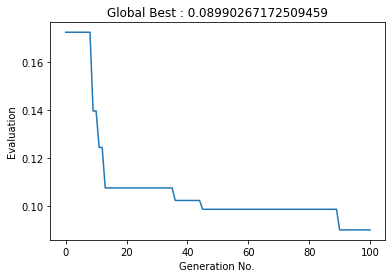

In [192]:
size = 300
dim = 5
lb = -10
ub = 10
iterations = 100
alpha = 2.0
beta = 2.0
inertia = 0.2
t = 0
overall_best_fitness = []

#Initialize Locations
particles = generate_griewank_popn(size,dim,lb,ub)

#Initialize velocities
velocities = init_velocities(size,dim)

#Calculate Fitness Values
fitness_population = popn_fitness(particles)

#Determine best particle in the population
best_fitness = min(fitness_population)
best_particle_index = fitness_population.index(min(fitness_population))
global_best_particle = particles[best_particle_index]
overall_best_fitness.append(best_fitness)

#Determine particle's best position, at the start it is its initial position
particles_best = particles

while t < iterations:
	#Calculate the new velocities
	new_velocity = velocity_update(inertia,velocities,alpha,beta,particles,global_best_particle,particles_best)

	#Calculate the new locations
	new_particles = position_update(new_velocity,particles)

	#Clip the variable values to the bounds
	new_particles = within_range(new_particles,lb,ub)

	# for k in range(size):
	# 	print(f"Particle {k+1} : {particles[k]}")
	# 	print(f"New Velocity {k+1} : {new_velocity[k]}")
	# 	print(f"New Position {k+1} : {new_particles[k]}")

	#Update each particle's best position
	for new, best in zip(new_particles,particles_best):
		if griewank(new) < griewank(best):
			best = new
	
	#Calculate Fitness Values
	fitness_population = popn_fitness(new_particles)

	#Determine global best particle in the population
	best_fitness_now = min(fitness_population)
	best_particle_index_now = fitness_population.index(min(fitness_population))

	#Update the global best
	if best_fitness_now < best_fitness:
		best_fitness = best_fitness_now
		global_best_particle = new_particles[best_particle_index_now]

	overall_best_fitness.append(best_fitness)

	#Update the velocities and position
	velocities = new_velocity
	particles = new_particles

	t=t+1

last_global_best = min(overall_best_fitness)

plt.plot(overall_best_fitness)
plt.title(f"Global Best : {str(last_global_best)}")
plt.ylabel("Evaluation")
plt.xlabel("Generation No. ")
plt.show()